In [81]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt


def M(xi,omegas,H=100, cp = 1500, cs = 100):
    
    val = []
    if type(omegas) == float:
        omega = omegas
        alpha = ((omega/xi/cp)**2 - 1+0j)**(1/2)
        beta = ( (omega/xi/cs)**2 - 1+0j )**(1/2)
        k = (cp/cs)**2

        MAT = np.array([
            [xi*sin(H*alpha),      cos(H*alpha),                          beta*cos(H*beta),   - beta*sin(H*beta)],
            [alpha*cos(H*alpha), - alpha*sin(H*alpha),                  + xi*sin(H*beta),     + xi*cos(H*beta) ],
            [0,                  (2*alpha**2 - k**2*(alpha**2 + xi**2)),  2*beta*xi, 0],
            [2*alpha*xi, 0, 0, - (beta**2 - xi**2)]
        ])
        return MAT
        
    for omega in omegas:
        alpha = ((omega/xi/cp)**2 - 1+0j)**(1/2)
        beta = ( (omega/xi/cs)**2 - 1+0j )**(1/2)
        k = (cp/cs)**2

        MAT = np.array([
            [xi*sin(H*alpha),      cos(H*alpha),                          beta*cos(H*beta),   - beta*sin(H*beta)],
            [alpha*cos(H*alpha), - alpha*sin(H*alpha),                  + xi*sin(H*beta),     + xi*cos(H*beta) ],
            [0,                  (2*alpha**2 - k**2*(alpha**2 + xi**2)),  2*beta*xi, 0],
            [2*alpha*xi, 0, 0, - (beta**2 - xi**2)]
        ])
        val.append( MAT )
    
    return val



In [84]:
from scipy.optimize import minimize, minimize_scalar,brentq
import numpy as np

xis = np.array([0.001,0.001])
oms = []

om0= [0.0559485,0.0615]

for xi,start in zip(xis,om0):

    def obj (f): 
        # return np.abs(np.linalg.det(M(xi,f)))
        return np.linalg.det(M(xi,f))

    # m = minimize(obj, start,method='SLSQP') # tried: Nelder-Mead
    m = brentq(obj,0.04,0.06)
    # oms.append(m.x)
    
oms = np.array(oms)
oms

array([], dtype=float64)

In [85]:
obj(0.04)

(-1.6066589375737656e+87+1.944125600974267e+73j)

NameError: name 'f' is not defined

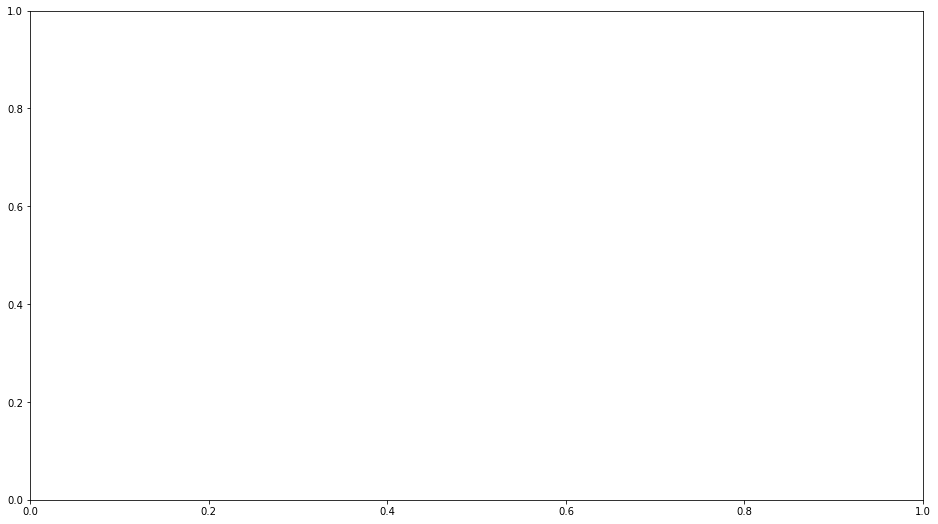

In [58]:
flist = np.linspace(0.06,0.065,10000)
plt.subplots(figsize=(16,9))

for kk in (0.001,0.0011):
    disp = []
    for ff in flist:
        disp.append( np.linalg.det(M(kk,[ff]))) 
    disp=np.array(disp)

    
    plt.plot(flist,np.abs(disp))
    plt.ylim([-1e83,1e83])
    # plt.xlim([0.0558,0.056])
plt.grid()
# plt.plot(flist[disp>0],np.abs(disp[disp>0]))
# plt.plot(flist[disp<0],np.abs(disp[disp<0]))
# plt.yscale('log')

plt.show()